<br><br>
<font size='6'><b>Supervised Learning</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "100%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 65% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 35%>
        by Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 0. Supervised learning
- Given training set $\left\{ \left(x^{(1)}, y^{(1)}\right), \left(x^{(2)}, y^{(2)}\right),\cdots,\left(x^{(m)}, y^{(m)}\right) \right\}$


- Want to find a function $g_{\omega}$ with learning parameter, $\omega$
    - $g_{\omega}$ desired to be as close as possible to $y$ for future $(x,y)$
    - $i.e., g_{\omega}(x) \sim y$


- Define a loss function $\ell$


- Solve the following optimization problem:

$$ 
\begin{align*}
\text{minimize} &\quad f(\omega) = \frac{1}{m} \sum_{i=1}^{m} \ell \left(g_{\omega} \left(x^{(i)}\right), y^{(i)}\right)\\
\text{subject to} &\quad \omega \in \boldsymbol{\omega}
\end{align*}
$$

<img src='./image_files/Supervised learning.png', width=500>

# 1. Regression

## 1.1. k-Nearest Neighbor Regression

The goal is to make quantitative (real valued) predictions on the basis of a (vector of) features or attributes.

We write our model as

$$Y = f(X) + \epsilon$$

where $\epsilon$ captures measurement errors and other discrepancies.

Then, with a good $f$ we can make predictions of $Y$ at new points $X = x$. One possible way so called "nearest neighbor method" is:

$$\hat{f} = \text{Ave}\,\left(Y \mid X \in \mathcal{N}(x)\right)$$

where $\mathcal{N}(x)$ is some neighborhood of $x$

<img src='./image_files/neighborhood_estimate.png' width = 500>

- Regression 에 사용할 데이터 생성

In [1]:
import numpy as np

In [2]:
N = 100
w1 = 3
w0 = 2
x = np.random.uniform(0, 10, N)
y = w1*x + w0 + 5*np.random.normal(0, 1, N)

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

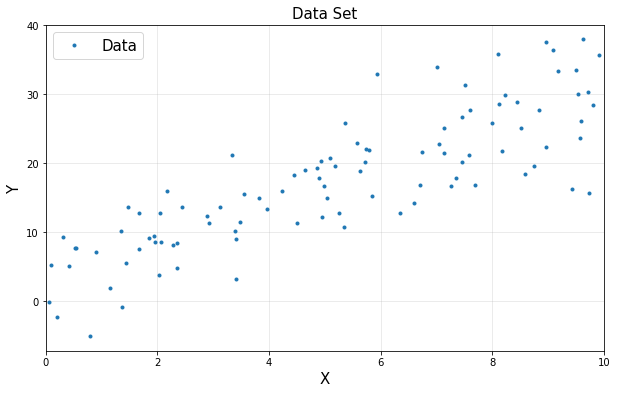

In [4]:
plt.figure(figsize=(10, 6))
plt.title('Data Set', fontsize=15)
plt.plot(x, y, '.', label='Data')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.xlim([0, 10])
plt.grid(alpha=0.3)
plt.show()

- sklearn.neighbors에 있는 KNeighborsRegressor import

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(x.reshape(-1, 1), y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [7]:
x_new = np.array([[5]])

In [8]:
pred = reg.predict(5)

In [9]:
print(pred)

[ 16.5196895]


- plot

In [10]:
xp = np.linspace(0, 10, 100).reshape(-1, 1)
yp = reg.predict(xp)

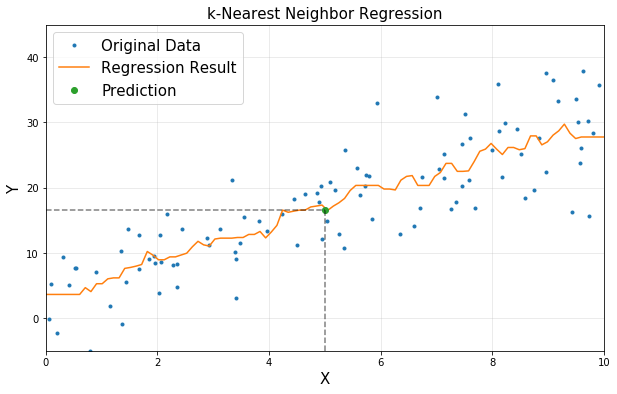

In [11]:
plt.figure(figsize=(10, 6))
plt.title('k-Nearest Neighbor Regression', fontsize=15)
plt.plot(x, y, '.', label='Original Data')
plt.plot(xp, yp, label='Regression Result')
plt.plot(x_new, pred, 'o', label='Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-5, pred[0]], 'k--', alpha=0.5)
plt.plot([0, x_new[0,0]], [pred[0], pred[0]], 'k--', alpha=0.5)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.xlim([0, 10])
plt.ylim([-5, 45])
plt.grid(alpha=0.3)
plt.show()

## 1.2. Linear Regression

선형 회귀 분석 (fitting)

$\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\omega_{1}$ and $\omega_{0}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix} \approx
\hat{y}_{i} = \omega_{1}x_{i} + \omega_{0} $$

- $ \hat{y}_{i} $ : predicted output 

- $ \omega = 
\begin{bmatrix}
\omega_{1} \\
\omega_{0} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}, \omega) \; \text{ in general}$$

- in many cases, a linear model to predict $y_{i}$ used


$$ \hat{y}_{i} = \omega_{1}x_{i} + \omega_{0} \; \\ \text{  such that  } \min\limits_{\omega_{1}, \omega_{0}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2$$

<table style='border-style: hidden; border-collapse: collapse;' width = 900> 
    <tr>
        <td width = 400 style='border-style: hidden; border-collapse: collapse;'>
            <img src='./image_files/linear_regression02.jpg' width = 300>
        </td>       
        <td width = 400>
            <img src='./image_files/linear_regression.png' width = 300>
        </td>
    </tr>
</table>

To see how it works, click [here](http://i-systems.github.io/HSE545/machine%20learning%20all/03%20Regression/iSystems_01_Regression.html) 

- Regression 에 사용할 데이터 생성

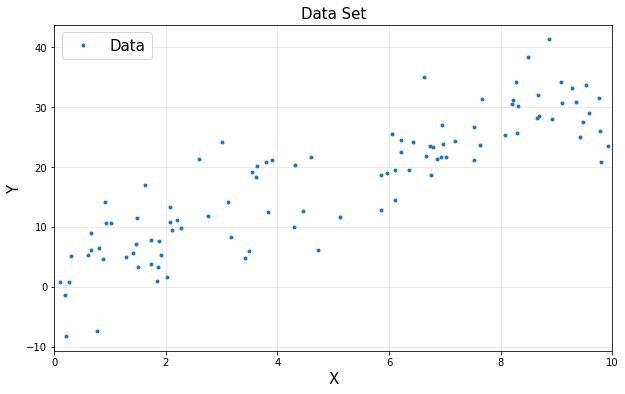

In [12]:
import numpy as np

N = 100
w1 = 3
w0 = 2
x = np.random.uniform(0, 10, N)
y = w1*x + w0 + 5*np.random.normal(0, 1, N)

import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(10, 6))
plt.title('Data Set', fontsize=15)
plt.plot(x, y, '.', label='Data')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.xlim([0, 10])
plt.grid(alpha=0.3)
plt.show()

- sklearn.linear_model 에 있는 LinearRegression import

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- 새로운 데이터에 대하여 predict

In [15]:
x_new = np.array([[6]])

In [16]:
pred = reg.predict(x_new)

In [17]:
print(pred)

[ 20.78413979]


- parameters 확인 및 plot

In [18]:
w1_pred = reg.coef_
w0_pred = reg.intercept_
print('w1 pred : ', w1_pred[0])
print('w1 original : ', w1)
print('w0 pred : ', w0_pred)
print('w0 : ', w0)

w1 pred :  3.00789939237
w1 original :  3
w0 pred :  2.73674343365
w0 :  2


In [19]:
xp = np.linspace(0, 10)
yp = w1_pred*xp + w0_pred

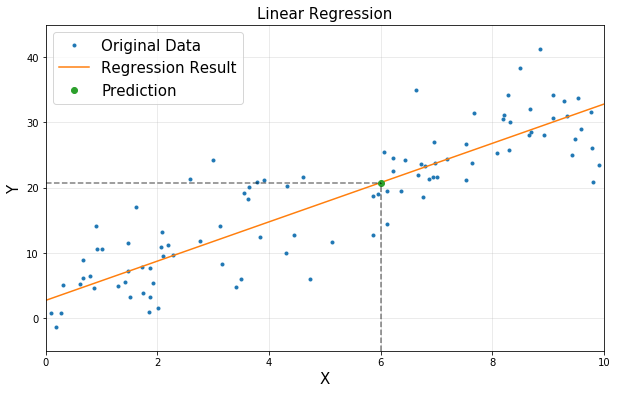

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Linear Regression', fontsize=15)
plt.plot(x, y, '.', label='Original Data')
plt.plot(xp, yp, label='Regression Result')
plt.plot(x_new, pred, 'o', label='Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-5, pred[0]], 'k--', alpha=0.5)
plt.plot([0, x_new[0,0]], [pred[0], pred[0]], 'k--', alpha=0.5)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.xlim([0, 10])
plt.ylim([-5, 45])
plt.grid(alpha=0.3)
plt.show()

# 2. Classification

## 2.1. Data Generation for Classification

- Classification에 사용할 데이터 생성

In [21]:
import matplotlib.pyplot as plt

C0 = np.random.multivariate_normal([0, 0], np.eye(2), 200)
C1 = np.random.multivariate_normal([10, 10], np.eye(2), 200)
C2 = np.random.multivariate_normal([-5, 5], np.eye(2), 200)

y0 = np.array(C1.shape[0]*[0])
y1 = np.array(C1.shape[0]*[1])
y2 = np.array(C1.shape[0]*[2])

- Plot을 통하여 데이터 파악

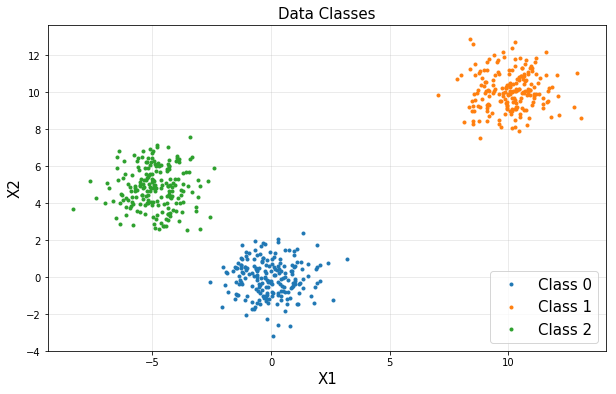

In [22]:
plt.figure(figsize=(10, 6))
plt.title('Data Classes', fontsize=15)
plt.plot(C0[:,0], C0[:,1], '.', label='Class 0')
plt.plot(C1[:,0], C1[:,1], '.', label='Class 1')
plt.plot(C2[:,0], C2[:,1], '.', label='Class 2')
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

## 2.2. K-nearest neighbors

- In k-NN classification, an object is assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).
- If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

<img src = "./image_files/KNN 1_100.png" width=50%>

- Zoom in,

<img src = "./image_files/knn_img.png" width=30%>

__Binary Classification__

- C0와 C1 데이터를 분류
- 데이터를 X, y로 병합

In [23]:
X = np.vstack([C0, C1])
y = np.hstack([y0, y1])

- Plot을 통하여 결과 확인

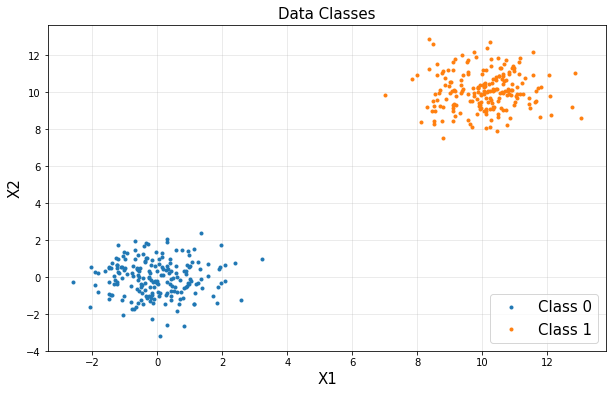

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Data Classes', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- Sklearn neighbors을 import
- KNeighborsClassifier 개체를 선언 후 피팅

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [27]:
X_new = np.array([2, 0])
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 2)

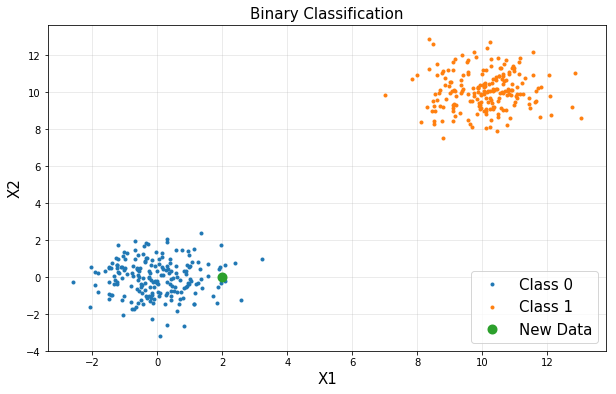

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Binary Classification', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.plot(X_new[0,0], X_new[0,1], 'o', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- Class 0에 속함

In [29]:
pred = clf.predict(X_new)
print(pred)

[0]


# 3. Support Vector Machine (SVM)

To see how it works, click [here](http://i-systems.github.io/HSE545/machine%20learning%20all/04%20Classification/iSystems_02_SVM.html)

- 가장 많이 쓰이는 모델

- 경계선과 데이터 사이의 거리 (margin) 을 최대화 하는 모델

## 3.0. Distance from a line

$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2\end{bmatrix}, \, x = \begin{bmatrix}x_1\\x_2\end{bmatrix} \; \implies g(x) = \omega^Tx + \omega_0 = \omega_1x_1 + \omega_2x_2 + \omega_0$$

<br>
<img src="./image_files/line_dist01.jpg", width = 500>
<br>

- If $\vec p$ and $\vec q$ are on the decision line

$$\begin{align*} g\left(\vec p\right) = g\left(\vec q\right) = 0
& \implies \omega^T \vec p + \omega_0 = \omega^T \vec q + \omega_0 = 0 \\
& \implies \omega^T \left( \vec p- \vec q \right) = 0 \\ \\
& \therefore \, \omega : \text{normal to the line (orthogonal)} 
\implies \text{tells the direction of the line}
\end{align*}$$
<br>
- If $x$ is on the line and $x = d\frac{\omega}{\lVert \omega \rVert}$ (where $d$ is a normal distance from the origin to the line)

$$ \begin{align*}  g(x)& = \omega^Tx + \omega_0 = 0 \;  \\
& \implies \omega^Td\frac{\omega}{\lVert \omega \rVert} + \omega_0 = d\frac{\omega^T\omega}{\lVert \omega \rVert} + \omega_0 = d\lVert \omega \rVert + \omega_0 = 0 \\
& \therefore d \, = - \frac{\omega_0}{\lVert \omega \rVert}
\end{align*}$$

<br>
- for any vector of $x$

$$ x = x_{\perp} + r \frac{\omega}{\lVert \omega \rVert}$$

$$ \omega^Tx = \omega^T \left( x_{\perp} + r \frac{\omega}{\lVert \omega \rVert}\right) = r \frac{\omega^T\omega}{\lVert \omega \rVert} = r \lVert \omega \rVert$$
<br>
$$ \begin{align*} g(x)
& = \omega^Tx + \omega_0 \\
& = r \lVert \omega \rVert + \omega_0 \qquad (r = d + h) \\
&  = (d +h) \lVert \omega \rVert + \omega_0 \\
& = \left(- \frac{\omega_0}{\lVert \omega \rVert} + h \right)\lVert \omega \rVert + \omega_0 \\
&  = h \lVert \omega \rVert
\end{align*}$$

$$\therefore \; h = \frac{g(x)}{\lVert \omega \rVert} \implies\; \mathbf{orthogonal \;distance \; from\; the\; line} $$

<br>
<img src="./image_files/line_dist02.jpg", width = 600>
<br>

- Distance (= margin)
$$\text{margin} = \frac{2}{\lVert \omega \rVert _2}$$

- Minimize $\lVert \omega \rVert_2$ to maximize the margin

$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 \\
\text{subject to} \quad
& C_1\omega + \omega_0 \geq 1 \\
& C_2\omega + \omega_0 \leq -1 \\
\end{align*}$$

<img src = "./image_files/SVM.png", width=400>

## 3.1. Binary Classification

- C0와 C1 데이터를 분류
- 데이터를 X, y로 병합

In [30]:
X = np.vstack([C0, C1])
y = np.concatenate([y0, y1])

- sklearn.svm 모듈에서 SVC import
- svc 개체를 선언 후 피팅

In [31]:
from sklearn.svm import SVC

In [32]:
clf = SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [33]:
X_new = np.array([7, 10])
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 2)

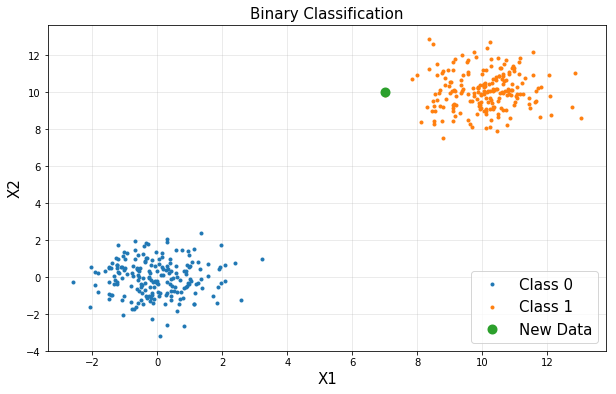

In [34]:
plt.figure(figsize=(10, 6))
plt.title('Binary Classification', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.plot(X_new[0,0], X_new[0,1], 'o', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- 새로운 데이터는 Class 1에 속함

In [35]:
clf.predict(X_new)

array([1])

## 3.2. Multi Classification

- C0, C1, C2 데이터를 분류
- Binary classification 에 이용된 코드와 동일
- X, y로 병합

In [36]:
X = np.vstack([C0, C1, C2])
y = np.concatenate([y0, y1, y2])

- sklearn.svm 모듈에서 SVC import
- svc 개체를 선언 후 피팅

In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [39]:
X_new = np.array([-5, 4])
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 2)

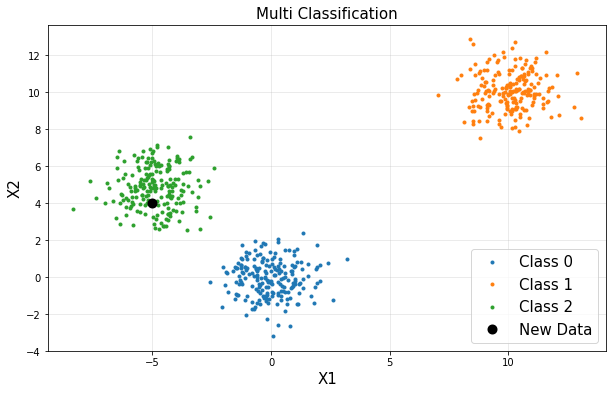

In [40]:
plt.figure(figsize=(10, 6))
plt.title('Multi Classification', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.plot(X[y==2,0], X[y==2,1], '.', label='Class 2')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- 새로운 데이터는 Class1에 속함

In [41]:
clf.predict(X_new)

array([2])


# 4. Logistic Regression

- Logistic regression is a classification algorithm - don't be confused
- We want to use _distance information of all data points_ $\rightarrow$ logistic regression

<img src="./image_files/logistic_regression_distance.png", width=80%>

- basic idea: find the decision boundary (hyperplane) of $g(x)=\omega^T x =0$ such that maximizes $\prod_i \lvert h_i \rvert$
    - Inequality of arithmetic and geometric means
$$ \frac{h_1+h_2}{2} \geq \sqrt{h_1 h_2} $$ 
 and that equality holds if and only if $h_1 = h_2$


- Roughly speaking, this optimization of $\max \prod_i \lvert h_i \rvert$ tends to position a hyperplane in the middle of two classes

$$h = \frac{g(x)}{\lVert \omega \rVert} = \frac{\omega^T x}{\lVert \omega \rVert} \approx \omega^T x$$

- We link or squeeze $(-\infty, +\infty)$ to $(0,1)$ for several reasons:

<img src="./image_files/link_function.png", width=50%>

- If $\sigma(z)$ is the sigmoid function, or the logistic function
$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma(\omega^T x) = \frac{1}{1+e^{-\omega^T x}}$$
 - logistic function generates a value where is always either 0 or 1
 - Crosses 0.5 at the origin, then flattens out
 
 
- Classified based on probability

<img src="./image_files/logit_clf.png", width=500>

To see how it works, click [here](http://i-systems.github.io/HSE545/machine%20learning%20all/04%20Classification/iSystems_03_logistic_regression.html)

## 4.1. Binary Classification

- C0와 C1 데이터를 분류
- 데이터를 X, y로 병합

In [42]:
X = np.vstack([C0, C1])
y = np.hstack([y0, y1])

- Plot을 통하여 결과 확인

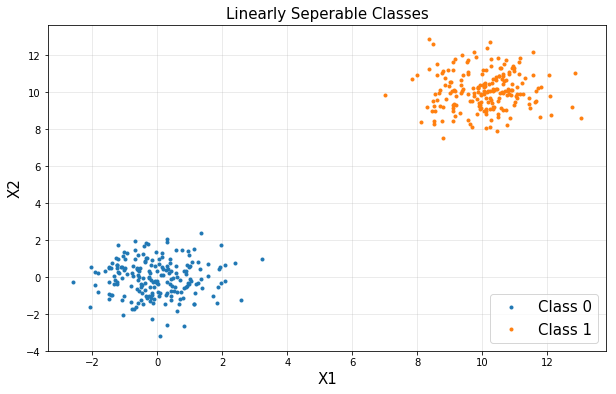

In [43]:
plt.figure(figsize=(10, 6))
plt.title('Linearly Seperable Classes', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- Sklearn linear_model을 import
- LogisticRegression 개체를 선언 후 피팅

In [44]:
from sklearn import linear_model

In [45]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [46]:
X_new = np.array([2, 0])
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 2)

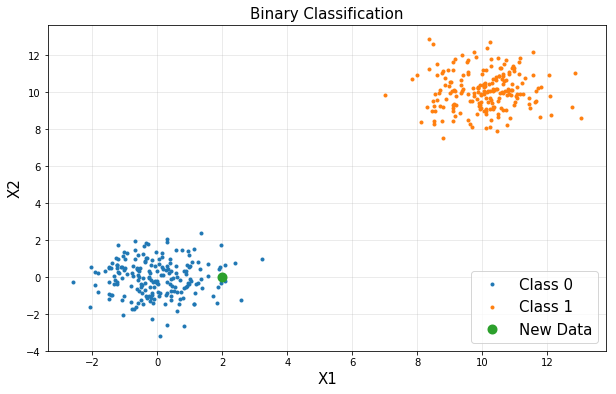

In [47]:
plt.figure(figsize=(10, 6))
plt.title('Binary Classification', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.plot(X_new[0,0], X_new[0,1], 'o', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- Class 0에 속함

In [48]:
pred = clf.predict(X_new)
print(pred)

[0]


In [49]:
pred = clf.predict_proba(X_new)
print(pred)

[[ 0.9538944  0.0461056]]


## 4.2. Multi Classification

- C0, C1, C2 데이터를 분류
- Binary classification 에 이용된 코드와 동일
- X, y로 병합

In [50]:
X = np.vstack([C0, C1, C2])
y = np.hstack([y0, y1, y2])

- Plot을 통하여 결과 확인

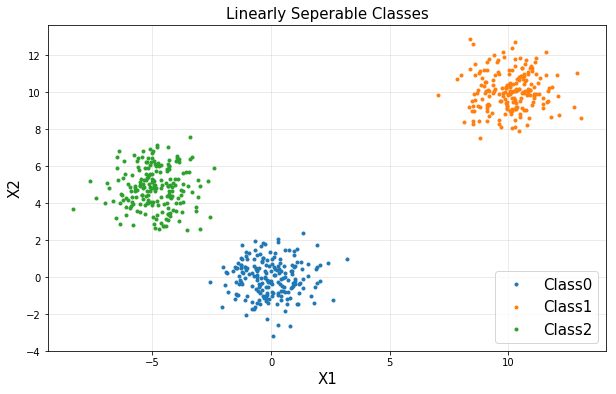

In [51]:
plt.figure(figsize=(10, 6))
plt.title('Linearly Seperable Classes', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class1')
plt.plot(X[y==2,0], X[y==2,1], '.', label='Class2')
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- Sklearn linear_model을 import
- LogisticRegression 개체를 선언 후 피팅

In [52]:
from sklearn import linear_model

In [53]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [54]:
X_new = np.array([7, 10])
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 2)

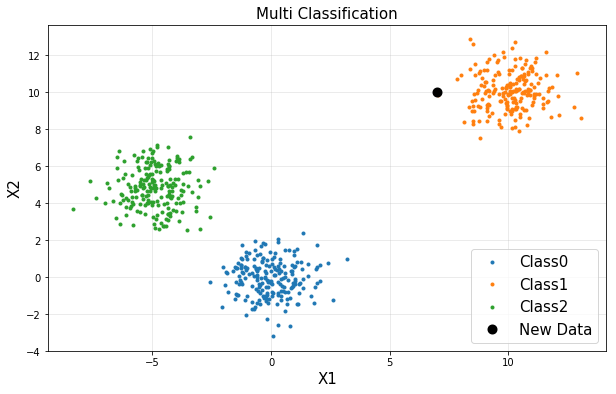

In [55]:
plt.figure(figsize=(10, 6))
plt.title('Multi Classification', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class1')
plt.plot(X[y==2,0], X[y==2,1], '.', label='Class2')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- Predict로 예측

In [56]:
prob = clf.predict(X_new)
print(prob)

[1]


In [57]:
prob = clf.predict_proba(X_new)
print(prob)

[[  1.15846006e-04   9.90478147e-01   9.40600702e-03]]


# 5. Nonlinear Classification

**Classifying non-linear separable data**
- Consider the binary classification problem
    - each example represented by a single feature $x$
    - No linear separator exists for this data

<img src="./image_files/nonlinear_1D.png", width = 300>

- Now map each example as $x \rightarrow \{x,x^2\}$


- Data now becomes linearly separable in the new representation

<img src="./image_files/linear_2D.png", width = 300>

- Linear in the new representation $=$ nonlinear in the old representation

- Let's look at another example
    - Each example defined by a two features $x=\{x_1, x_2\}$
    - No linear separator exists for this data

<img src="./image_files/nonlinear_2D.png", width = 300>

- Now map each example as $x=\{x_1, x_2\} \rightarrow z=\{x_1^2,\sqrt{2}x_1x_2,x_2^2\}$
    - Each example now has three features (derived from the old represenation)


- Data now becomes linear separable in the new representation

<img src="./image_files/linear_3D.png", width = 300>

To see how it works, click [here](http://i-systems.github.io/HSE545/machine%20learning%20all/04%20Classification/iSystems_02_SVM.html#4.-Nonlinear-Support-Vector-Machine)

- 이 부분 코드는 이해할 필요가 없으며, 개념적인 것만 이해하시면 됩니다
- Nonlinear Example

In [58]:
%%html
<center><iframe src="https://www.youtube.com/embed/3liCbRZPrZA" 
width="420" height="315" frameborder="0" allowfullscreen></iframe></center>

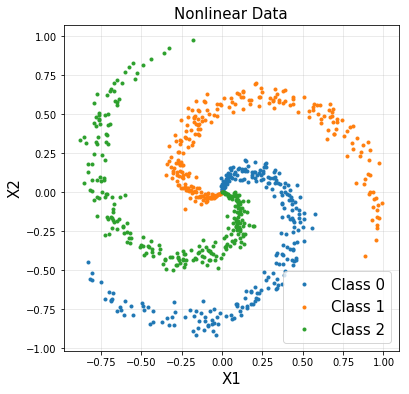

In [59]:
N = 250 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros([N*K, D]) # data matrix (each row = single example)
y = np.zeros(N*K) # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.figure(figsize=(6, 6))
plt.title('Nonlinear Data', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.plot(X[y==2,0], X[y==2,1], '.', label='Class 2')
plt.xlim(min(X[:,0]) - 0.1, max(X[:,0]) + 0.1)
plt.ylim(min(X[:,1]) - 0.1, max(X[:,1]) + 0.1)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC(kernel='linear', C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', C=1, gamma=5).fit(X, y)

In [62]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

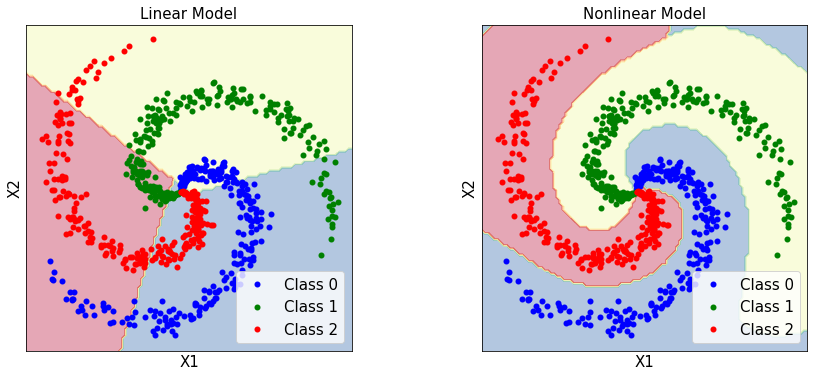

In [63]:
# title for the plots
titles = ['Linear Model', 'Nonlinear Model']

fig = plt.figure(figsize=(14, 6))
for i, clf in enumerate((svc, rbf_svc)):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral_r, alpha=0.4)

    # Plot also the training points
    plt.plot(X[y==0,0], X[y==0,1], 'b.', label='Class 0', mew=3)
    plt.plot(X[y==1,0], X[y==1,1], 'g.', label='Class 1', mew=3)
    plt.plot(X[y==2,0], X[y==2,1], 'r.', label='Class 2', mew=3)
    plt.legend(loc='lower right', fontsize=15)
    plt.xlabel('X1', fontsize=15)
    plt.ylabel('X2', fontsize=15)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i], fontsize=15)

plt.show()

# 6. Save Model

<img src='./image_files/Supervised learning.png', width=500>

- cPickle을 이용하여 학습된 모델 저장
    - 5.3. Nonlinear SVM 예제의 모델 

In [64]:
from six.moves import cPickle

In [65]:
cPickle.dump(svc, open('./data_files/svc_model.pkl', 'wb'))

- 학습된 모델 불러오기

In [66]:
svc_restore = cPickle.load(open('./data_files/svc_model.pkl', 'rb'))

- 새로운 데이터로 테스트해보기

In [67]:
X_new = np.array([-0.75, 0])
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 2)

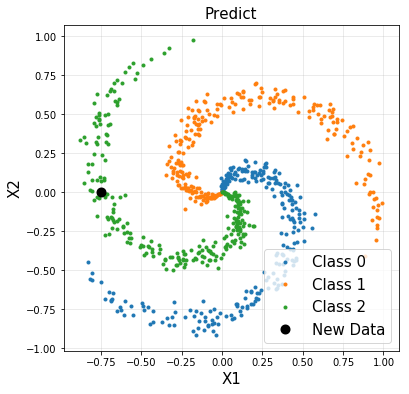

In [68]:
plt.figure(figsize=(6, 6))
plt.title('Predict', fontsize=15)
plt.plot(X[y==0,0], X[y==0,1], '.', label='Class 0')
plt.plot(X[y==1,0], X[y==1,1], '.', label='Class 1')
plt.plot(X[y==2,0], X[y==2,1], '.', label='Class 2')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.xlim(min(X[:,0]) - 0.1, max(X[:,0]) + 0.1)
plt.ylim(min(X[:,1]) - 0.1, max(X[:,1]) + 0.1)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- 저장된 모델을 이용한 새 데이터 예측

In [69]:
svc_restore.predict(X_new)

array([ 2.])

In [70]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>